In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar la base de datos
df = pd.read_csv("DatathonN.csv")
#df.columns = ['date', 'time', 'tweet', 'BUENO', 'NEUTRAL', 'MALO', 'QUEJA', 'AYUDA', 'AGRADECIMIENTO', 'OUTSTANDING', 'TÓPICO']

print(df.columns)
print(df['date'])
# Mostrar las primeras filas de datos
#print(df.head())

# Obtener información sobre las columnas y los tipos de datos
#print(df.info())

Index(['date', 'time', 'tweet', 'BUENO', 'NEUTRAL', 'MALO', 'QUEJA', 'AYUDA ',
       'AGRADECIMIENTO', 'OUTSTANDING ', 'TÓPICO '],
      dtype='object')
0      2023-01-01
1      2023-01-02
2      2023-01-02
3      2023-01-02
4      2023-01-02
          ...    
807    2024-04-21
808    2024-04-23
809    2024-04-23
810    2024-04-25
811    2024-04-26
Name: date, Length: 812, dtype: object


In [3]:
df['date'] = pd.to_datetime(df['date'])

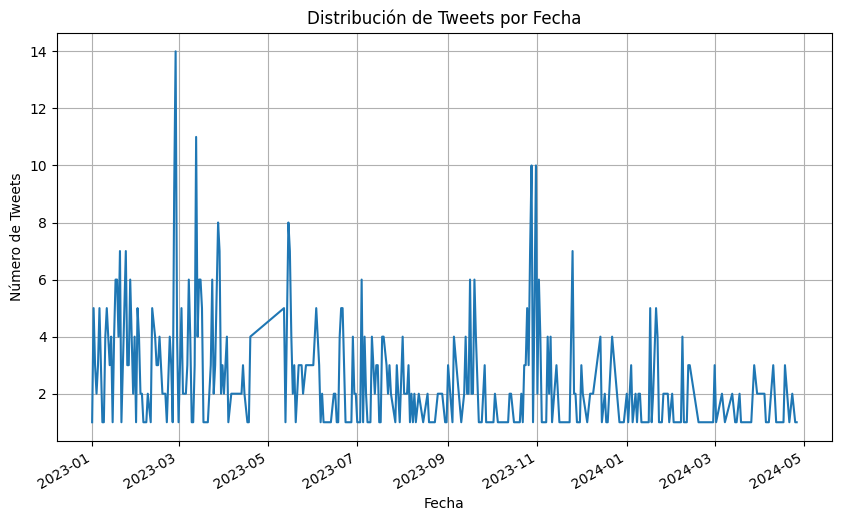

In [4]:
# Contar la cantidad de tweets por fecha
tweets_por_fecha = df['date'].value_counts().sort_index()

# Graficar la distribución de tweets por fecha
plt.figure(figsize=(10, 6))
tweets_por_fecha.plot(kind='line')
plt.title('Distribución de Tweets por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Tweets')
plt.grid(True)
plt.show()

# Análisis de Sentimientos

In [5]:
# Rellenar NaN con 0 en las columnas específicas
df['BUENO'] = df['BUENO'].fillna(0)
df['NEUTRAL'] = df['NEUTRAL'].fillna(0)
df['MALO'] = df['MALO'].fillna(0)

# Verificar el resultado para confirmar que solo se han rellenado los NaN
print(df.head())


        date time                                              tweet  BUENO  \
0 2023-01-01  NaN  Resuelto, muchísimas gracias , excelente servi...    1.0   
1 2023-01-02  NaN                       Muchas gracias, espero su dm    1.0   
2 2023-01-02  NaN                                    Muchas gracias!    1.0   
3 2023-01-02  NaN  Algo similar me paso. Quería renovar mi token ...    0.0   
4 2023-01-02  NaN  Yeeeei! a través de mi cuenta en acabo de cont...    1.0   

   NEUTRAL  MALO  QUEJA  AYUDA   AGRADECIMIENTO  OUTSTANDING    TÓPICO   
0      0.0   0.0    NaN     NaN             1.0           1.0  SERVICIO  
1      0.0   0.0    NaN     NaN             1.0           NaN       NaN  
2      0.0   0.0    NaN     NaN             1.0           NaN       NaN  
3      0.0   1.0    1.0     NaN             NaN           NaN  SERVICIO  
4      0.0   0.0    NaN     NaN             NaN           1.0  SERVICIO  


In [6]:
#Preparación de Datos 1 y 0, 1 quiere decir que representa ese sentimiento
df['sentimiento'] = np.select(
    [
        df['BUENO'] == 1,
        df['NEUTRAL'] == 1,
        df['MALO'] == 1
    ],
    [
        'positivo',
        'neutral',
        'negativo'
    ],
    default='no_identificado'
)

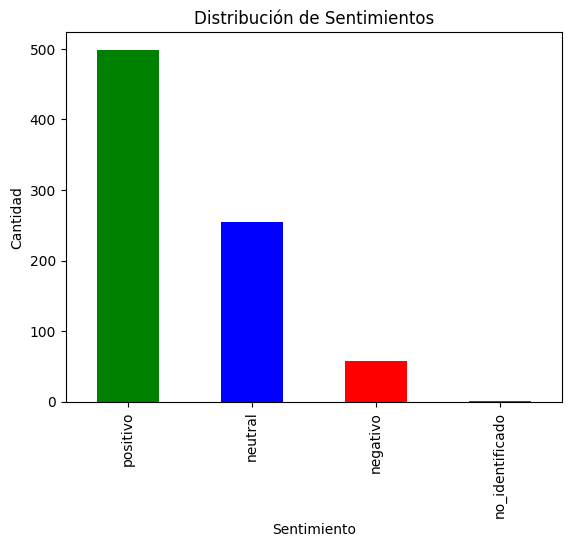

In [7]:
# Visualizar la distribución de sentimientos
df['sentimiento'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()


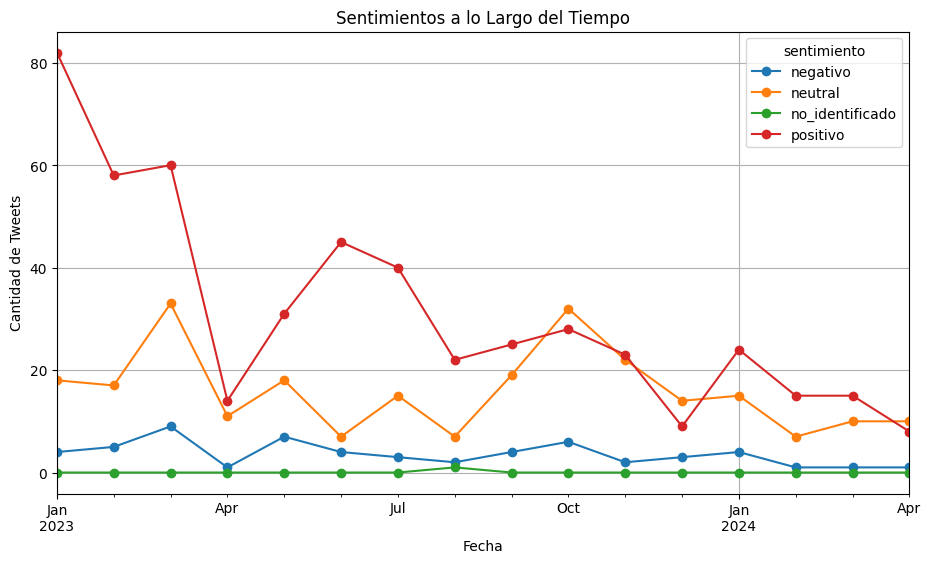

In [8]:
# Análisis de sentimientos a lo largo del tiempo
df['fecha'] = pd.to_datetime(df['date'])  # Asegurando que la columna 'date' sea datetime
sentimientos_por_fecha = df.groupby([df['fecha'].dt.to_period("M"), 'sentimiento']).size().unstack(fill_value=0)
sentimientos_por_fecha.plot(kind='line', marker='o', figsize=(11, 6))
plt.title('Sentimientos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.grid(True)
plt.show()


# Análisis de Tópicos


In [9]:
#Llenar los valores de la columna Tópico que estén vacíos
df['TÓPICO '] = df['TÓPICO '].fillna('Desconocido')
print(df['TÓPICO '])

0         SERVICIO
1      Desconocido
2      Desconocido
3         SERVICIO
4         SERVICIO
          ...     
807    Desconocido
808    Desconocido
809    Desconocido
810       SERVICIO
811       SERVICIO
Name: TÓPICO , Length: 812, dtype: object


<ipython-input-10-6ae0d566bd5f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_topicos.values, y=conteo_topicos.index, palette='viridis')


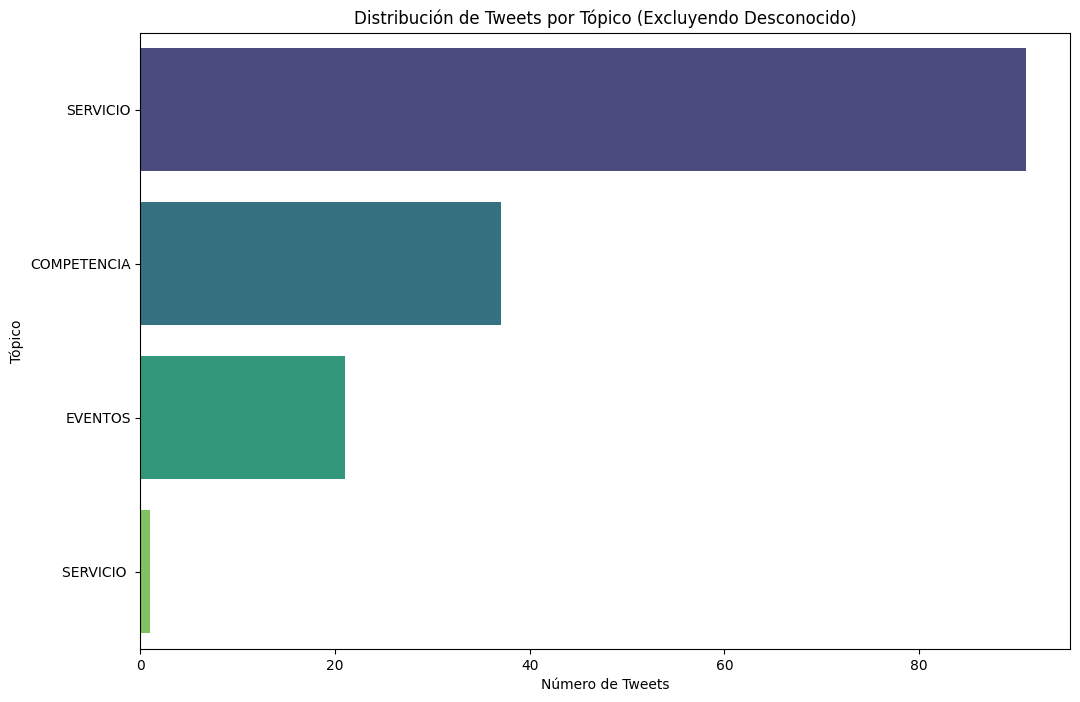

In [10]:
import seaborn as sns

# Filtrar los datos para excluir 'Desconocido' ya que son Tweets que no tenían ningún tópico identificado
df_filtrado = df[df['TÓPICO '] != 'Desconocido']

# Conteo de cada tópico
conteo_topicos = df_filtrado['TÓPICO '].value_counts()

# Gráfico de barras para la distribución de tópicos
plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_topicos.values, y=conteo_topicos.index, palette='viridis')
plt.title('Distribución de Tweets por Tópico (Excluyendo Desconocido)')
plt.xlabel('Número de Tweets')
plt.ylabel('Tópico')
plt.show()

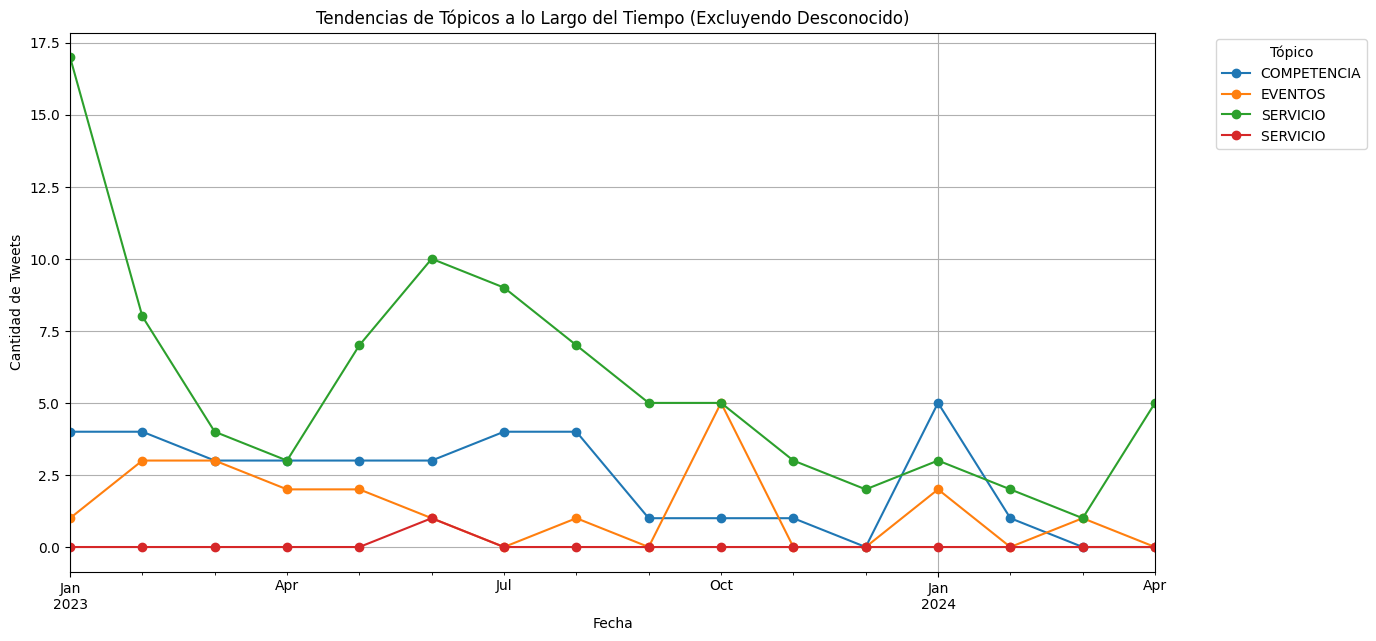

In [11]:
# Agrupar por fecha y tópico, excluyendo 'Desconocido'
tendencias_topicos = df_filtrado.groupby([df_filtrado['fecha'].dt.to_period('M'), 'TÓPICO ']).size().unstack(fill_value=0)

# Gráfico de líneas para tendencias de tópicos
tendencias_topicos.plot(kind='line', figsize=(14, 7), marker='o', linestyle='-')
plt.title('Tendencias de Tópicos a lo Largo del Tiempo (Excluyendo Desconocido)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.legend(title='Tópico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Análisis de Sentimiento por Tópico

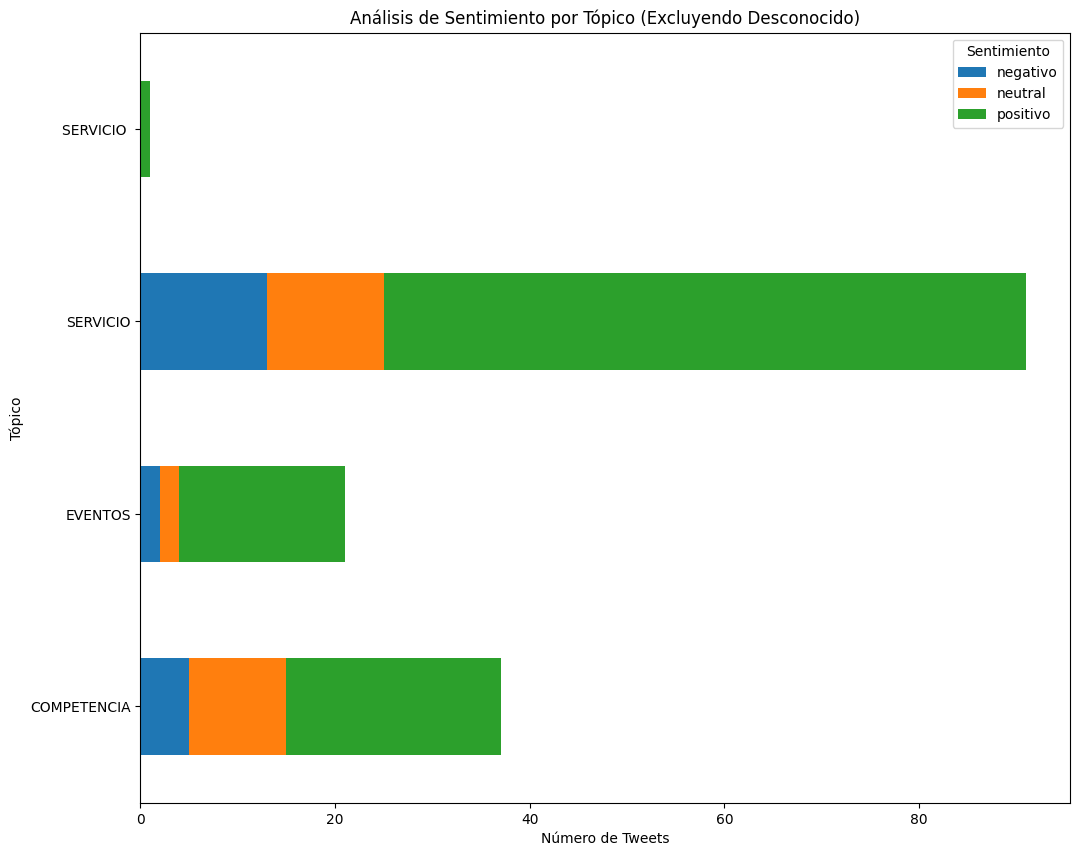

In [12]:
# Análisis de sentimiento excluyendo 'Desconocido'
sentimiento_topico = df_filtrado.groupby(['TÓPICO ', 'sentimiento']).size().unstack(fill_value=0)

# Gráfico de barras apiladas para sentimientos por tópico
sentimiento_topico.plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Análisis de Sentimiento por Tópico (Excluyendo Desconocido)')
plt.xlabel('Número de Tweets')
plt.ylabel('Tópico')
plt.legend(title='Sentimiento')
plt.show()


# Análisis de Palabras Relacionadas con el Producto

In [13]:
# Establecer la columna 'date' como índice del DataFrame
df.set_index('fecha', inplace=True)

In [14]:

!pip install nltk

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Función para limpiar y tokenizar los tweets
def tokenize_tweets(df):
    df['tokens'] = df['tweet'].apply(lambda x: word_tokenize(x.lower()))  # Convertir a minúsculas y tokenizar
    return df

df = tokenize_tweets(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
from collections import Counter

# Función para contar palabras por período
def count_words(df, period='M'):
    df['period'] = df.index.to_period(period)  # Crear una columna para el período
    grouped = df.groupby('period')['tokens'].sum()  # Agrupar y sumar tokens por período
    word_counts = grouped.apply(Counter).apply(pd.Series).fillna(0).astype(int)
    return word_counts

monthly_word_trends = count_words(df, 'M')


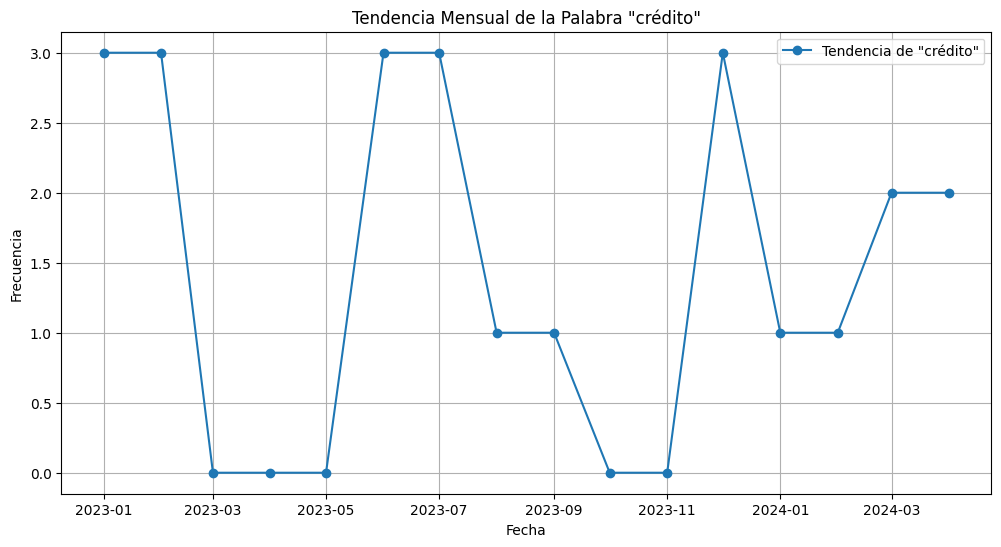

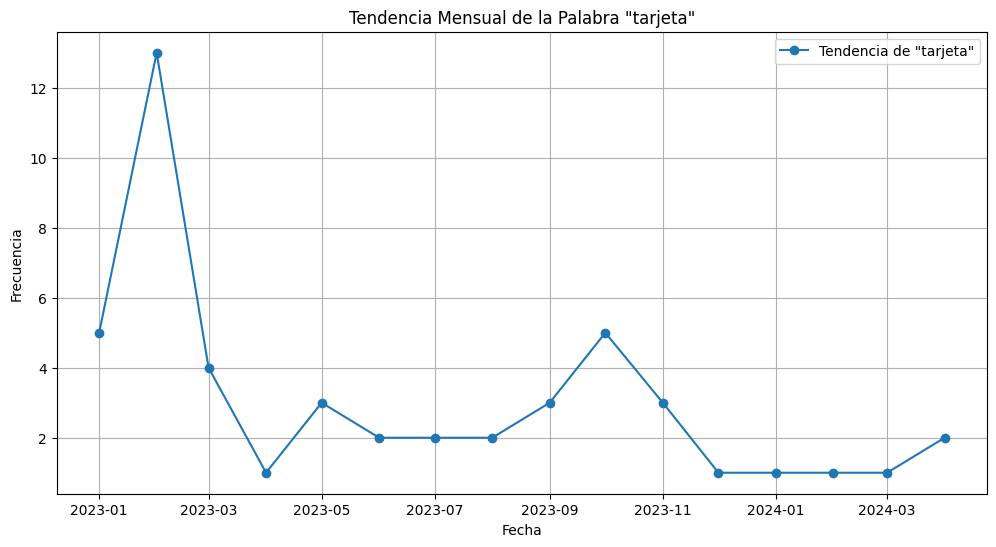

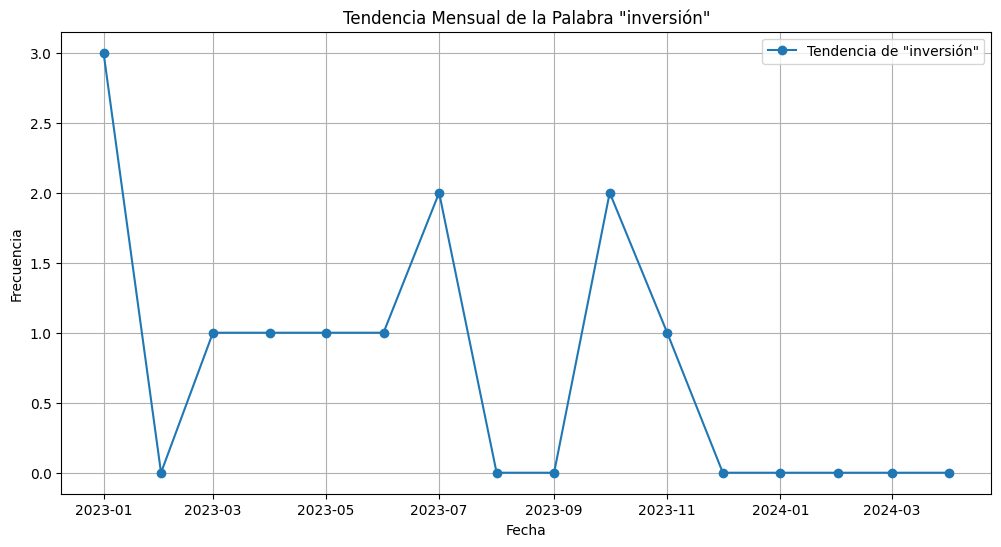

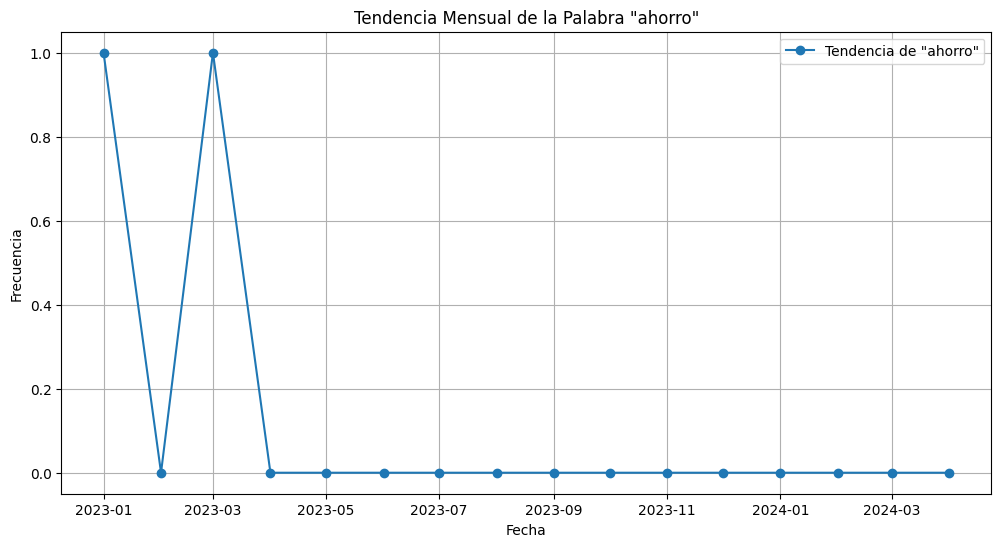

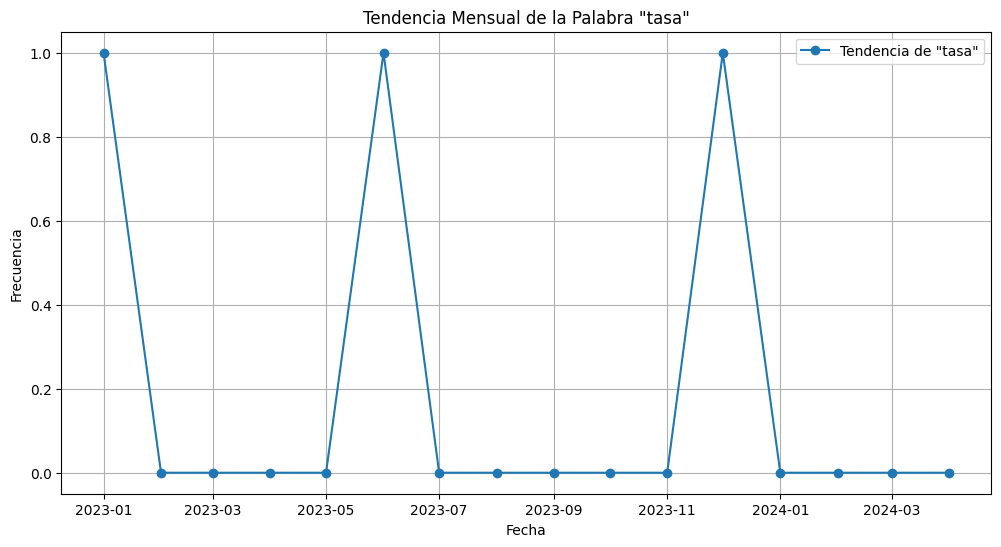

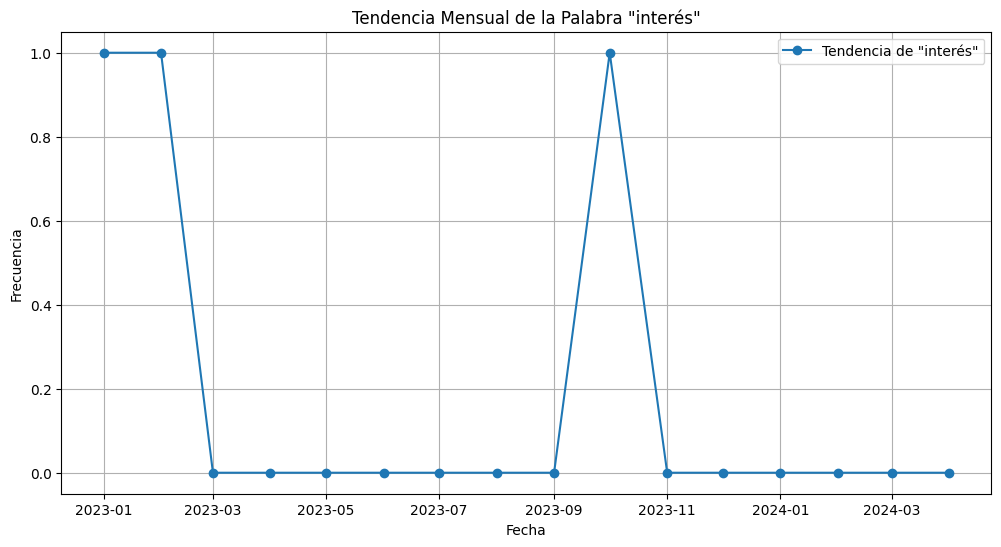

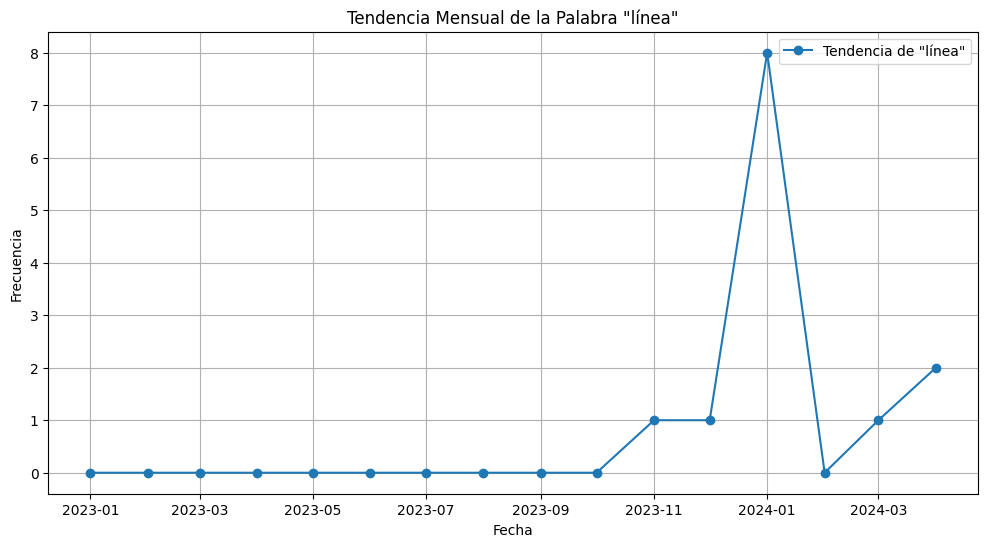

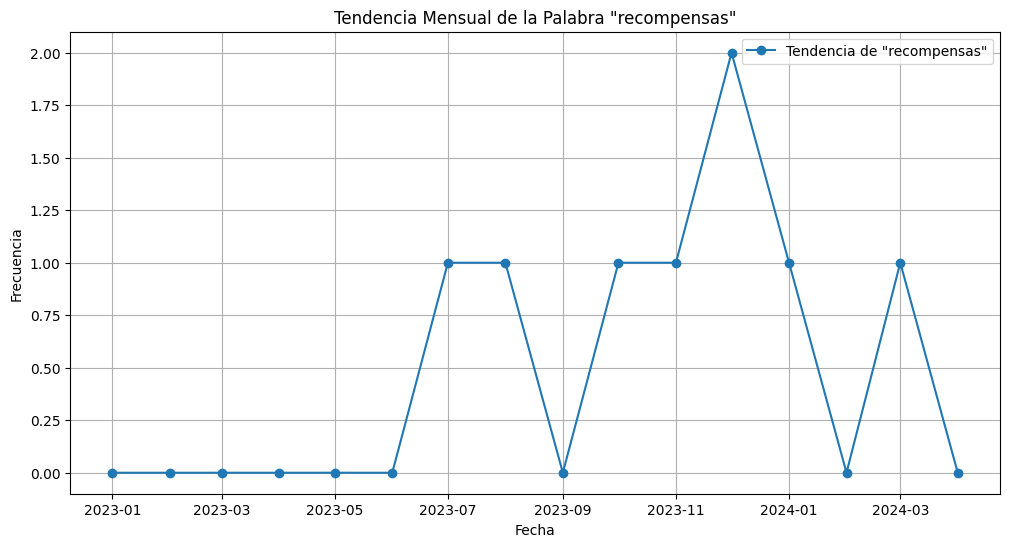

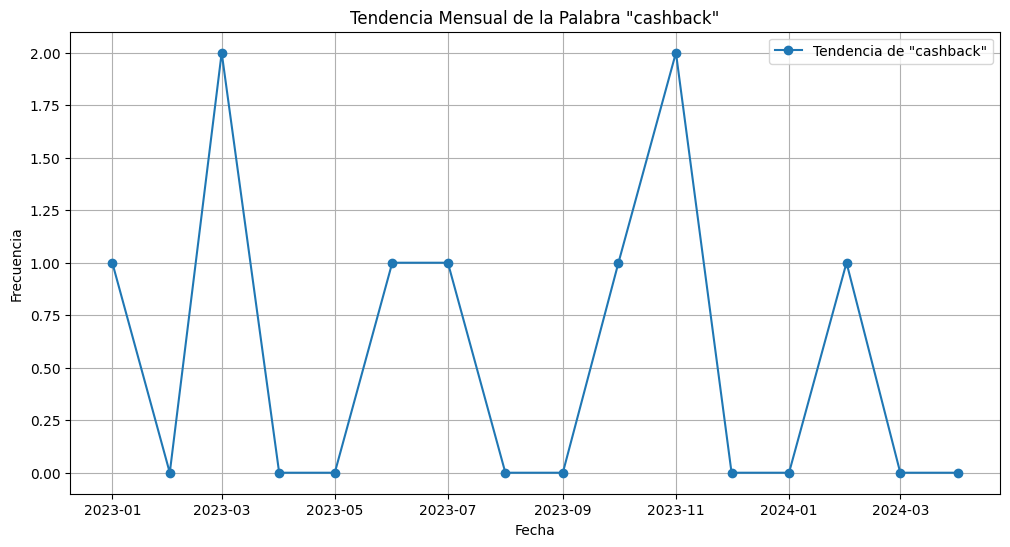

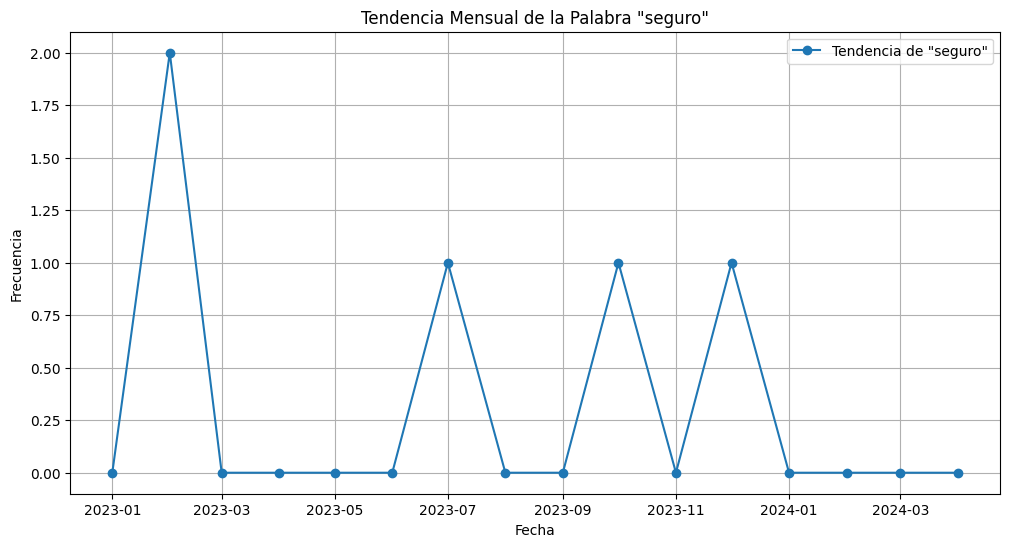

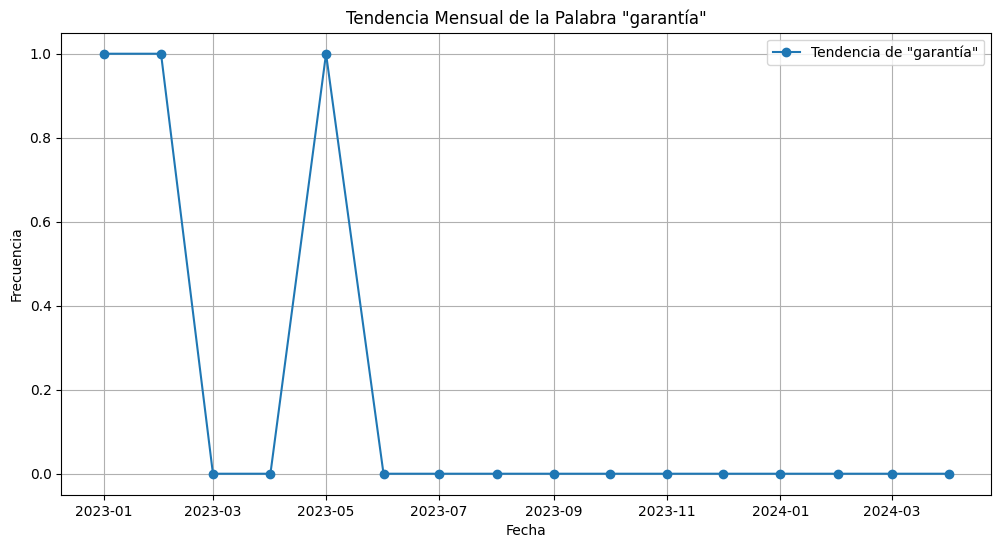

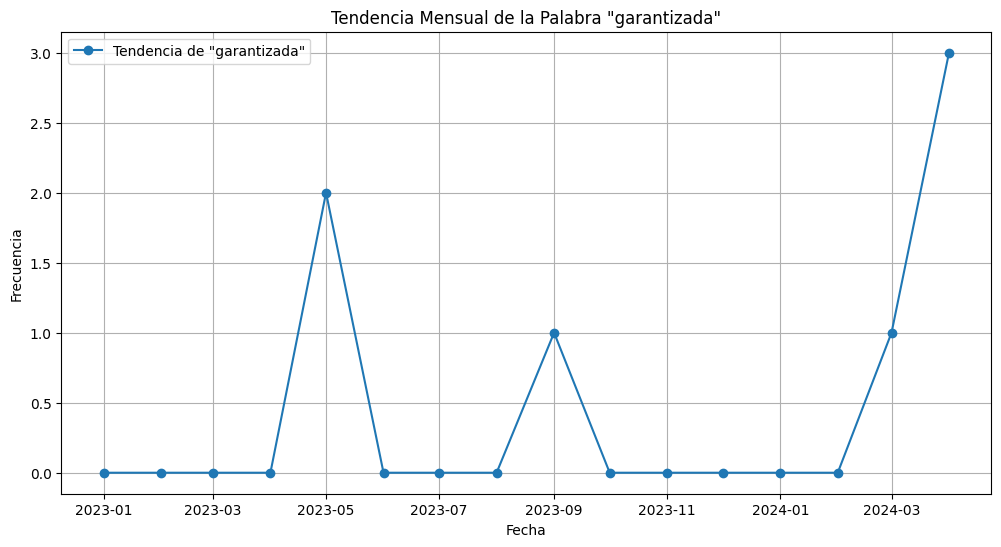

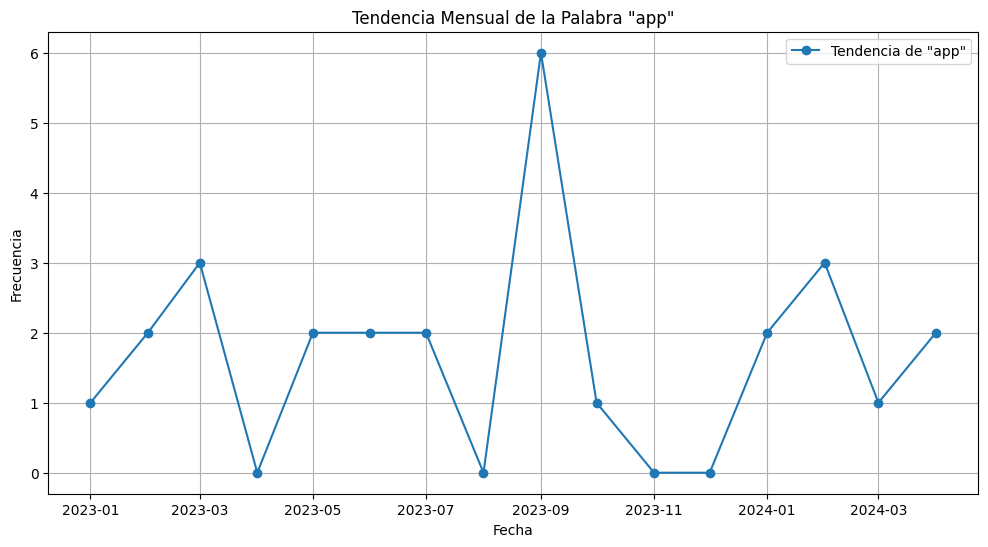

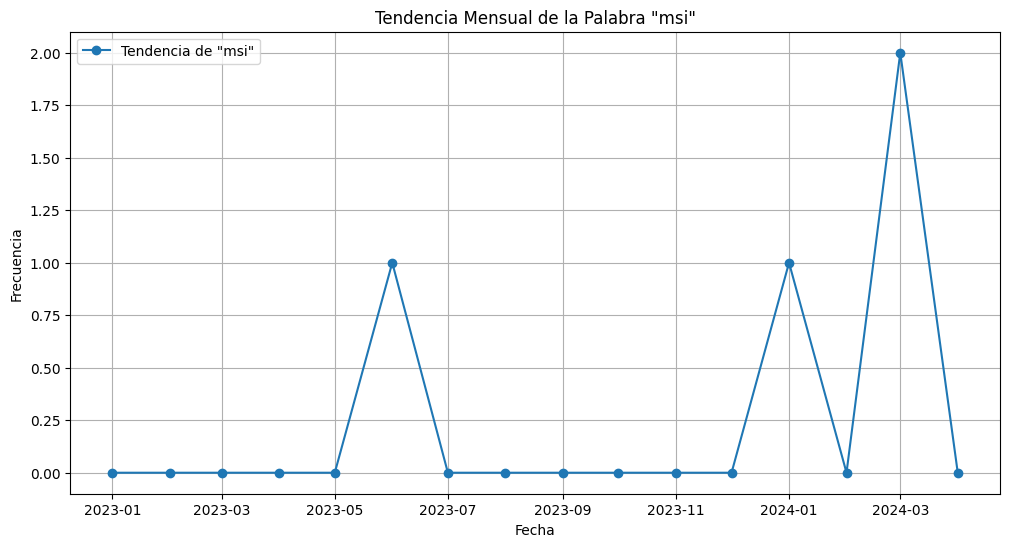

La palabra "promoción" no se encontró en los datos.


<Figure size 1200x600 with 0 Axes>

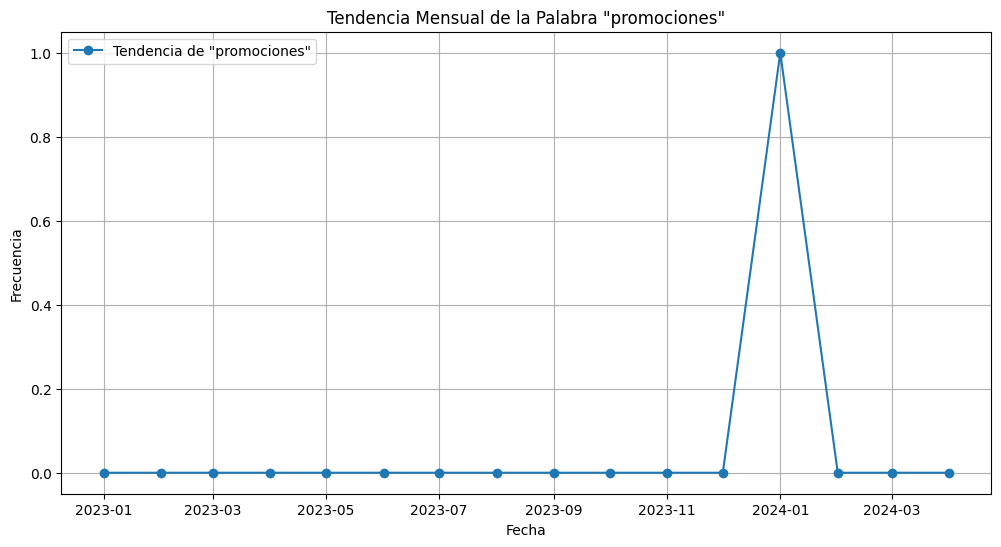

In [16]:
def plot_word_trends(word_counts, words):
    # Convertir índices de Period a Timestamp (fecha y hora estándar)
    word_counts.index = word_counts.index.to_timestamp()

    for word in words:
        plt.figure(figsize=(12, 6))
        if word in word_counts.columns:
            # Si la palabra existe, graficar la tendencia
            plt.plot(word_counts.index, word_counts[word], marker='o', linestyle='-', label=f'Tendencia de "{word}"')
            plt.title(f'Tendencia Mensual de la Palabra "{word}"')
            plt.xlabel('Fecha')
            plt.ylabel('Frecuencia')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            # Si la palabra no existe, imprimir un mensaje de error
            print(f'La palabra "{word}" no se encontró en los datos.')

# Suponiendo que 'monthly_word_trends' ya está definido y listo para usar
plot_word_trends(monthly_word_trends, ['crédito', 'tarjeta', 'inversión', 'ahorro','tasa','interés','línea','recompensas','cashback','seguro', 'garantía', 'garantizada', 'app', 'msi', 'promoción', 'promociones'])
